# **1. Loading libraries and data**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [12]:
df = pd.read_csv('churn_prediction.csv')

# **2. Undertanding the data**

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.duplicated().sum()

0

# **3. visualization Data befor handell**

In [ ]:
fig = px.pie(df, names='Churn', title='percentage of Churn')
fig.show()

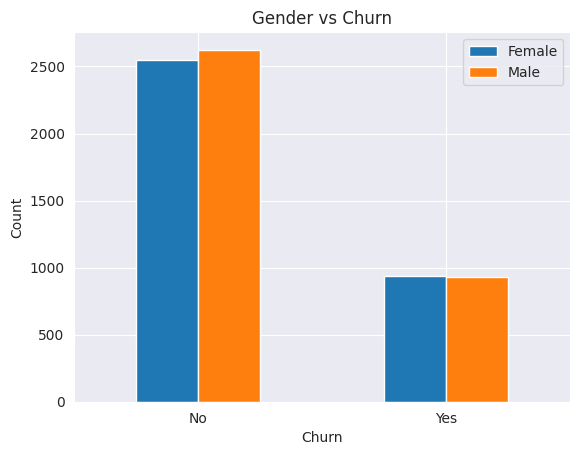

In [ ]:
pd.crosstab(df['Churn'], df['gender']).plot(kind='bar')
plt.title('Gender vs Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)
plt.show()

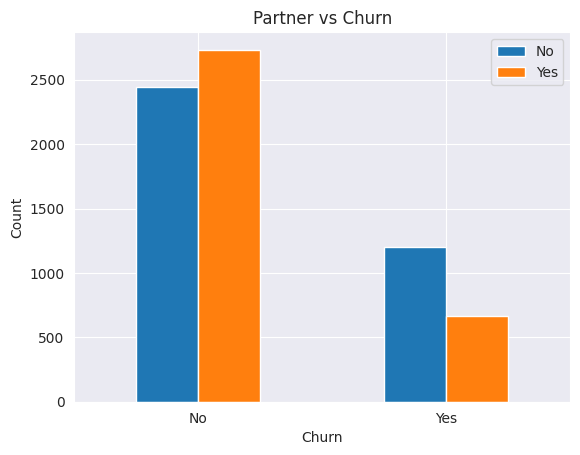

In [ ]:
pd.crosstab(df['Churn'], df['Partner']).plot(kind='bar')
plt.title('Partner vs Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

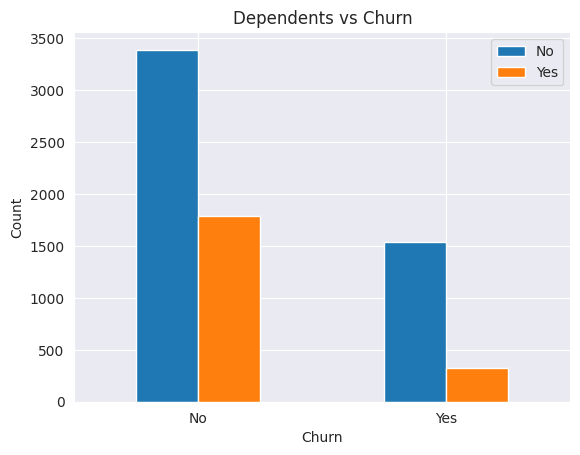

In [ ]:
pd.crosstab(df['Churn'], df['Dependents']).plot(kind='bar')
plt.title('Dependents vs Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

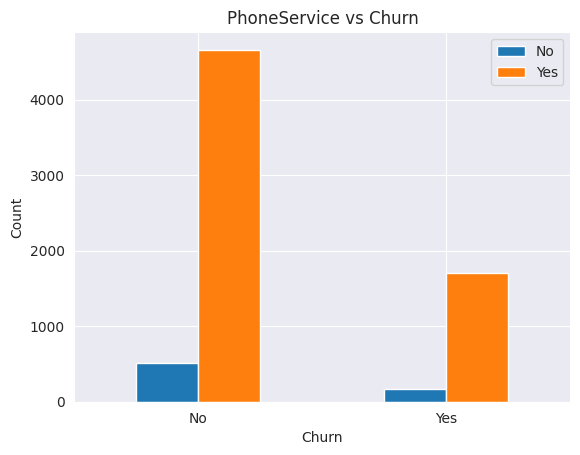

In [ ]:
pd.crosstab(df['Churn'], df['PhoneService']).plot(kind='bar')
plt.title('PhoneService vs Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

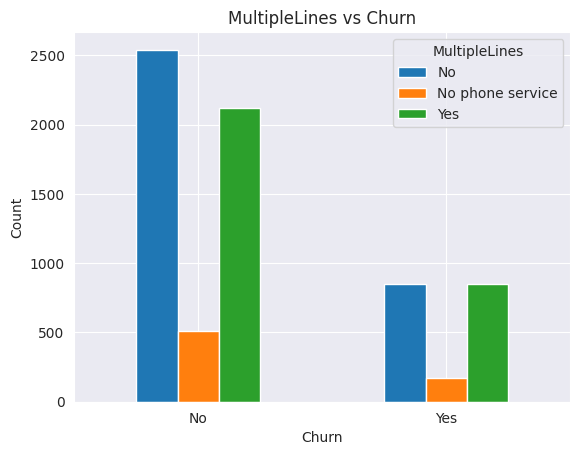

In [ ]:
pd.crosstab(df['Churn'], df['MultipleLines']).plot(kind='bar')
plt.title('MultipleLines vs Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [14]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.show()

In [15]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", barmode="group", title="<b>Customer payment method distribution<b>")
fig.show()

In [16]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [17]:
fig = px.histogram(df, x="Churn", color="InternetService", barmode="group", title="<b>Customer internet service distribution<b>")
fig.show()

# **4. Data Handling**

In [18]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [20]:
df.fillna(df["TotalCharges"].mean(),inplace=True)

In [21]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [22]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df["InternetService"].describe(include=['object', 'bool'])

,InternetService
count,7043
unique,3
top,Fiber optic
freq,3096


In [26]:
df.describe(exclude='object')

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


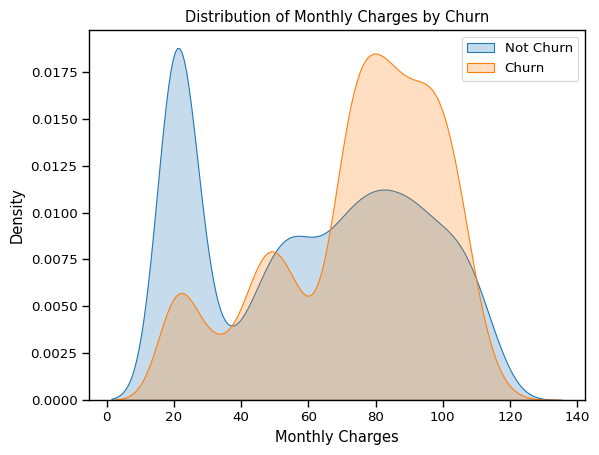

In [27]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],shade= True);
ax.set_title('Distribution of Monthly Charges by Churn')
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
plt.show()

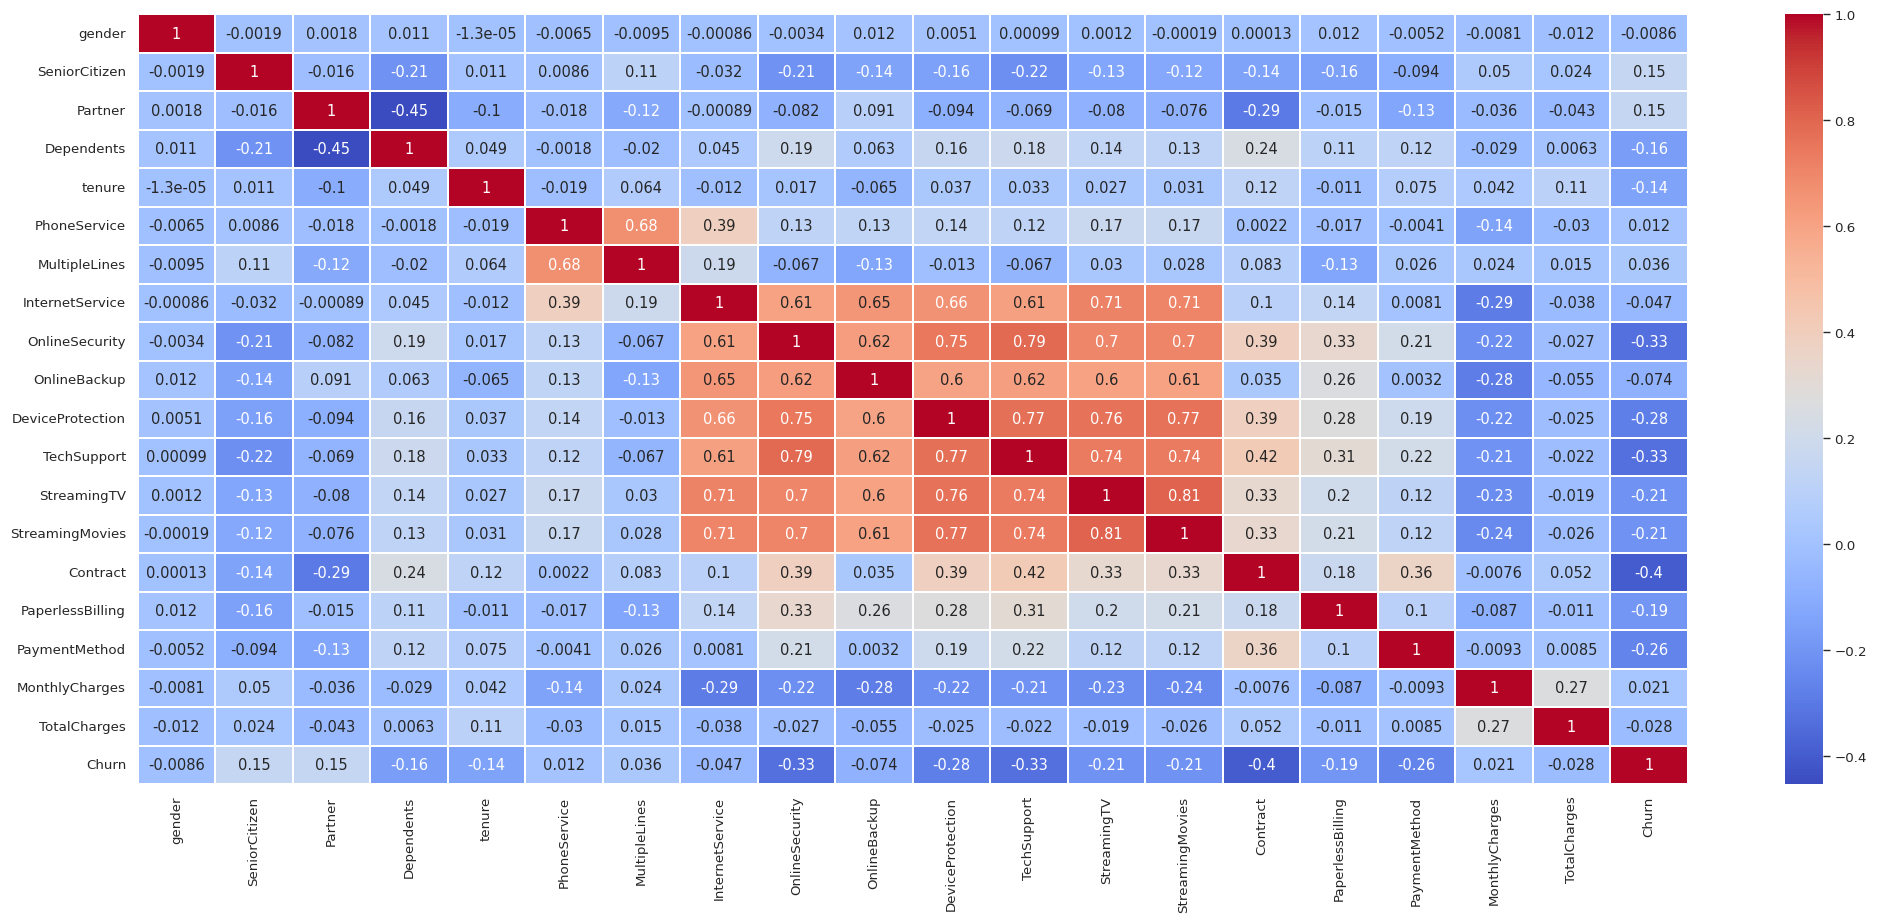

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm')
plt.show()

# **5. Data Preprocessing**

In [28]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [29]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [30]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
def distplot(feature, frame, color='g'):
    plt.figure(figsize=(12, 7))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

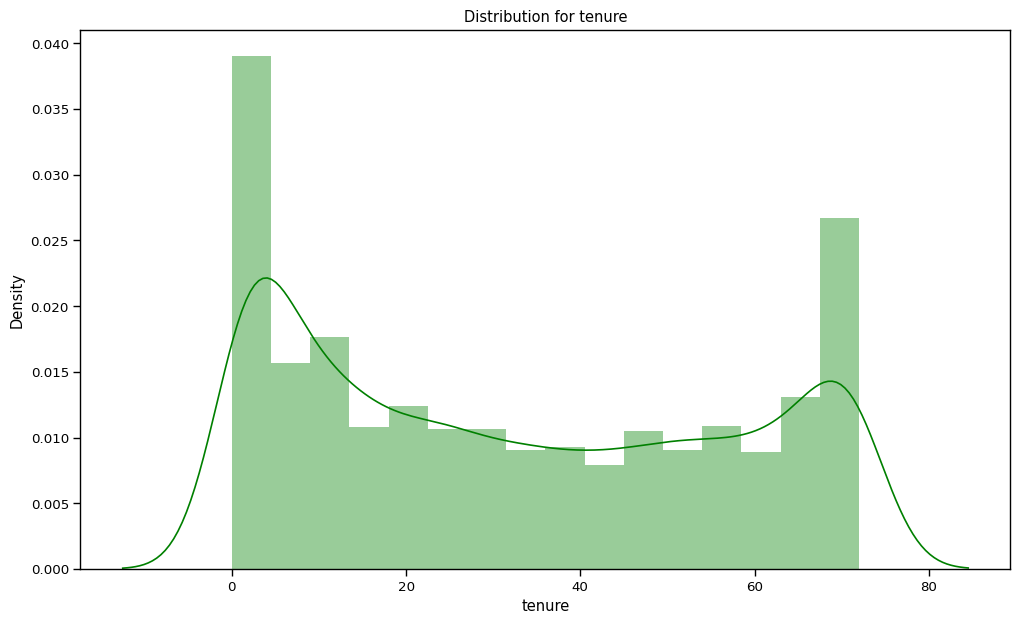

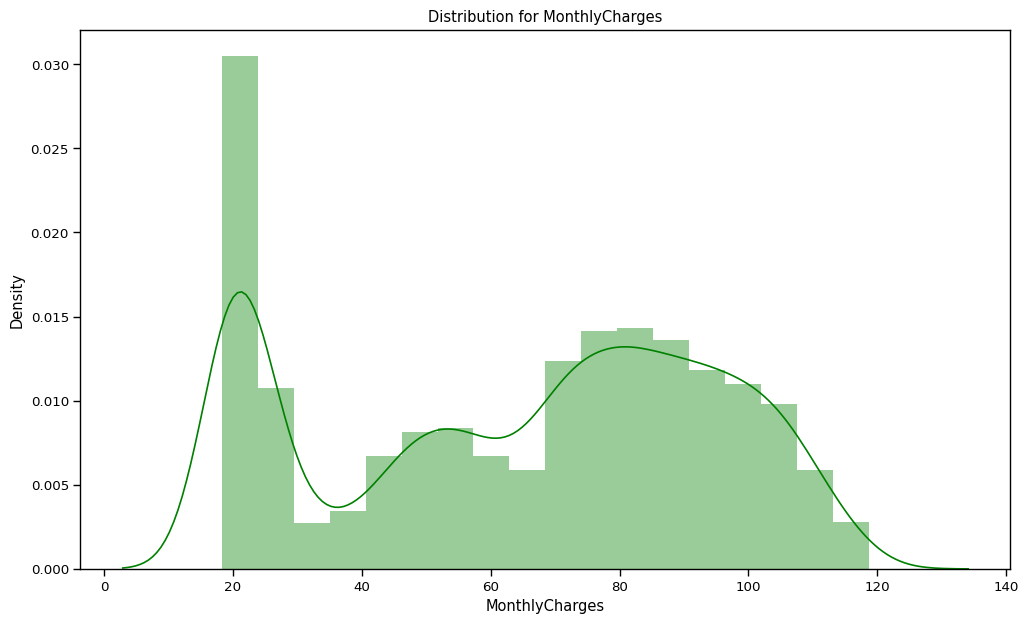

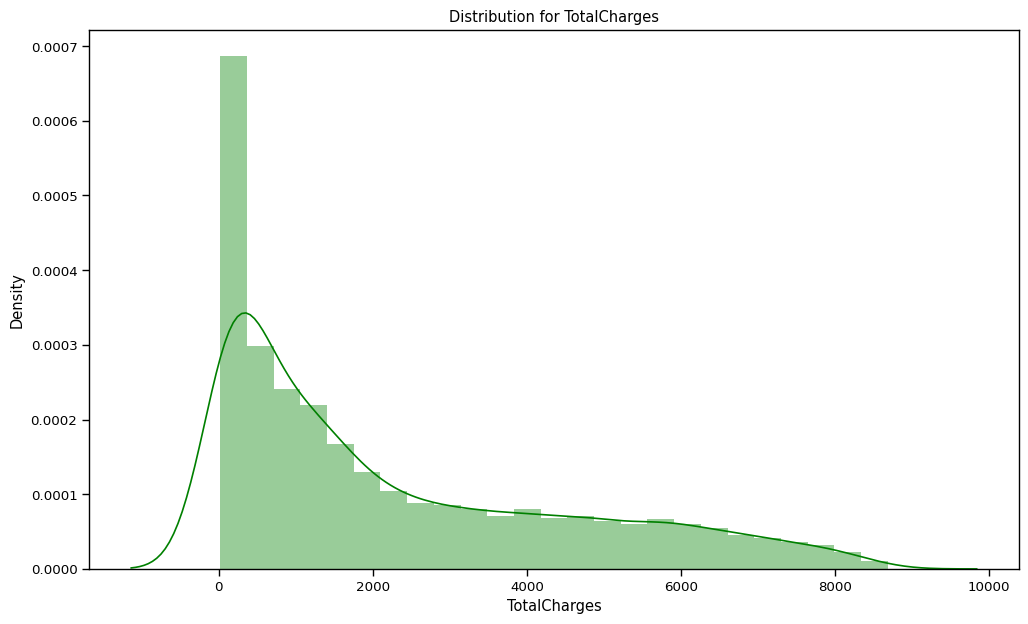

In [32]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

In [33]:
# StandardScaler
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# **6. Machine Learning Models**

## 1. KNN

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)


KNN accuracy: 0.7700496806245565


In [35]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1036
           1       0.64      0.31      0.41       373

    accuracy                           0.77      1409
   macro avg       0.71      0.62      0.64      1409
weighted avg       0.75      0.77      0.74      1409



## 2. Random Forest

In [36]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.794889992902768


In [37]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



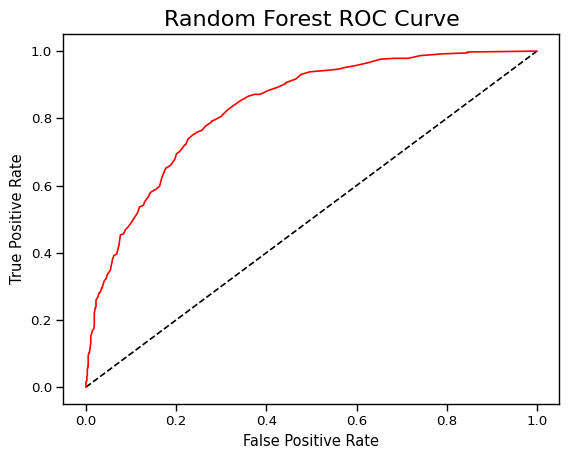

In [38]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

## 3. Logistic Regression

In [39]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8168914123491838


In [40]:
lr_pred= lr_model.predict(X_test)
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



## 4. XGBOOST

In [41]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
accuracy_xgb = xgb_model.score(X_test,y_test)
print("XGBOOST accuracy is :",accuracy_xgb)

XGBOOST accuracy is : 0.7821149751596878


In [42]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.61      0.50      0.55       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



## 5. CatBoost

In [51]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


In [56]:
from catboost import CatBoostClassifier
catboost_clf = CatBoostClassifier(verbose = False)

In [104]:
catboost_clf.fit(X_train, y_train, [])
accuracy_cb = catboost_clf.score(X_test,y_test)
print("CatBoostClassifier accuracy is :",accuracy_cb)

CatBoostClassifier accuracy is : 0.8026969481902059


# **7. Fine-tuning with Optuna**



In [61]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00


In [65]:
import optuna
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [68]:
def objective(trial):
    iterations = trial.suggest_int('iterations', 100, 1000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
    depth = trial.suggest_int('depth', 1, 10)
    l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 1, 10)
    model = CatBoostClassifier(iterations=iterations,
    learning_rate=learning_rate,
    depth=depth,
    l2_leaf_reg=l2_leaf_reg)

    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring='accuracy').mean()

    return score

In [69]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42))

[I 2024-09-17 07:45:11,825] A new study created in memory with name: no-name-a341f099-c170-4bd5-b039-4731787c899c


In [70]:
study.optimize(objective, n_trials=100)

[I 2024-09-17 07:45:29,219] Trial 0 finished with value: 0.7680126587664952 and parameters: {'iterations': 437, 'learning_rate': 0.4758500101408589, 'depth': 8, 'l2_leaf_reg': 6}. Best is trial 0 with value: 0.7680126587664952.
[I 2024-09-17 07:45:31,739] Trial 1 finished with value: 0.8042236340053049 and parameters: {'iterations': 240, 'learning_rate': 0.08643731496473929, 'depth': 1, 'l2_leaf_reg': 9}. Best is trial 1 with value: 0.8042236340053049.
[I 2024-09-17 07:45:39,539] Trial 2 finished with value: 0.7990758091791819 and parameters: {'iterations': 641, 'learning_rate': 0.35695556312006227, 'depth': 1, 'l2_leaf_reg': 10}. Best is trial 1 with value: 0.8042236340053049.
[I 2024-09-17 07:45:48,515] Trial 3 finished with value: 0.7957043408915038 and parameters: {'iterations': 850, 'learning_rate': 0.11404616423235531, 'depth': 2, 'l2_leaf_reg': 2}. Best is trial 1 with value: 0.8042236340053049.
[I 2024-09-17 07:45:57,016] Trial 4 finished with value: 0.7783090964395643 and para

In [71]:
best_params = study.best_params
best_score = study.best_value

In [72]:
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score:.3f}")

Best Hyperparameters: {'iterations': 179, 'learning_rate': 0.10603160258538114, 'depth': 1, 'l2_leaf_reg': 4}
Best Accuracy: 0.807


In [73]:
optuna.visualization.plot_optimization_history(study)

In [74]:
optuna.visualization.plot_parallel_coordinate(study)

In [75]:
optuna.visualization.plot_slice(study, params=['iterations', 'learning_rate', 'depth', 'l2_leaf_reg'])

In [76]:
optuna.visualization.plot_param_importances(study)

In [77]:
best_iterations = best_params['iterations']
best_learning_rate = best_params['learning_rate']
best_depth = best_params['depth']
best_l2_leaf_reg = best_params['l2_leaf_reg']

In [79]:
best_model = CatBoostClassifier(iterations=best_iterations,
    learning_rate=best_learning_rate,
    depth=best_depth,
    l2_leaf_reg=best_l2_leaf_reg,
    verbose= False)
best_model.fit(X_train, y_train, [])

In [80]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [103]:
accuracy_tuned_cb = best_model.score(X_test,y_test)
print("Tuned CatBoostClassifier accuracy is :",accuracy_tuned_cb)

Tuned CatBoostClassifier accuracy is : 0.8119233498935415


In [94]:
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-4, 1e4)
    max_iter = trial.suggest_int('max_iter', 100, 500)

    dct_params = {'newton-cg':['l2', 'none'],
              'lbfgs': ['l2', 'none'],
              'liblinear':['l1', 'l2'],
              'saga':['l1', 'l2', 'elasticnet']}
    for solver, pen in dct_params.items():
        for penalty in pen:
            model = LogisticRegression(
                C=C,
                penalty=penalty,
                solver=solver,
                max_iter=max_iter,
                verbose=0
            )

            score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

            return score

In [96]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

[I 2024-09-17 08:36:09,895] A new study created in memory with name: no-name-1293e260-6269-4aa2-935d-87e5aa0f44d3
[I 2024-09-17 08:36:10,231] Trial 0 finished with value: 0.7987219878298065 and parameters: {'C': 391.06500995030865, 'max_iter': 466}. Best is trial 0 with value: 0.7987219878298065.
[I 2024-09-17 08:36:10,523] Trial 1 finished with value: 0.7987219878298065 and parameters: {'C': 28.64600611685833, 'max_iter': 257}. Best is trial 0 with value: 0.7987219878298065.
[I 2024-09-17 08:36:10,834] Trial 2 finished with value: 0.7949944917344497 and parameters: {'C': 0.015283873745242593, 'max_iter': 318}. Best is trial 0 with value: 0.7987219878298065.
[I 2024-09-17 08:36:11,162] Trial 3 finished with value: 0.7983669056471148 and parameters: {'C': 2.444958913810628, 'max_iter': 434}. Best is trial 0 with value: 0.7987219878298065.
[I 2024-09-17 08:36:11,369] Trial 4 finished with value: 0.7344692916165616 and parameters: {'C': 0.00012849894958034535, 'max_iter': 489}. Best is tr

In [97]:
best_params = study.best_params
best_score = study.best_value

In [98]:
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score:.3f}")

Best Hyperparameters: {'C': 0.14455092192061028, 'max_iter': 469}
Best Accuracy: 0.800


In [99]:
best_lr_model = LogisticRegression(C=best_params['C'], max_iter=best_params['max_iter'])
best_lr_model.fit(X_train,y_train)
accuracy_best_lr = best_lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_best_lr)

Logistic Regression accuracy is : 0.8183108587650816


# **8. Results**

In [106]:
print("KNN:",accuracy_knn)
print ("RandomForest:", metrics.accuracy_score(y_test, prediction_test))
print("Logistic Regression:",accuracy_lr)
print("XGBOOST:",accuracy_xgb)
print("CatBoostClassifier:",accuracy_cb)
print("Tuned CatBoostClassifier",accuracy_tuned_cb)
print("Tuned Logistic Regression:",accuracy_best_lr)

KNN: 0.7700496806245565
RandomForest: 0.794889992902768
Logistic Regression: 0.8168914123491838
XGBOOST: 0.7821149751596878
CatBoostClassifier: 0.8026969481902059
Tuned CatBoostClassifier 0.8119233498935415
Tuned Logistic Regression: 0.8183108587650816
